<a href="https://colab.research.google.com/github/RaghavMaskara21/abc/blob/main/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a program to perform histogram equalization for a given color image with and without pre-defined function. Also, perform the histogram matching

Perform local histogram equalization using neighbourhood of size 3x3 on given image.

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

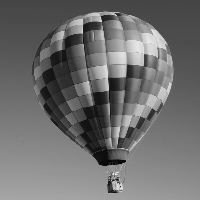

In [10]:
img = cv2.imread('pic1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, [200,200])
cv2_imshow(img)

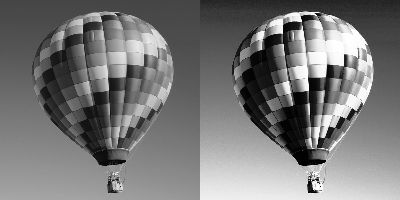

In [11]:
equalized_img = cv2.equalizeHist(img)
cv2_imshow(np.hstack([img, equalized_img]))

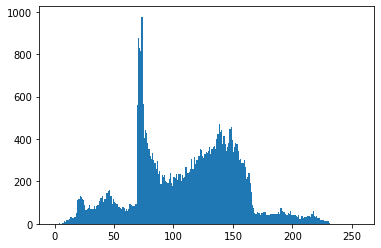

In [12]:
img_array = np.asarray(img)

plt.hist(img.flatten(), 256, [0,256])
plt.show()

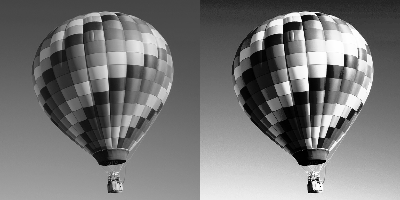

In [13]:
histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)


cv2_imshow(np.hstack([img, eq_img_array]))

In [14]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [15]:
def hist_match(original, specified):

    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(oldshape)

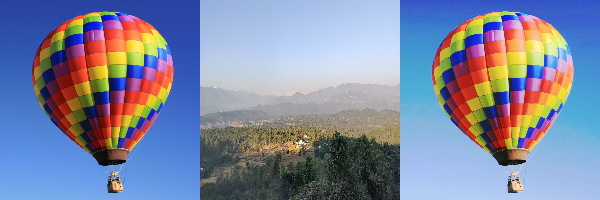

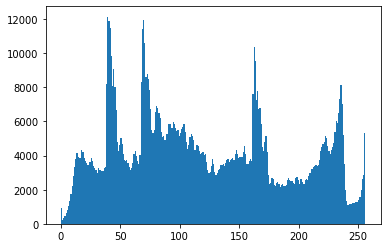

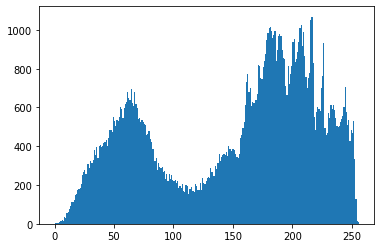

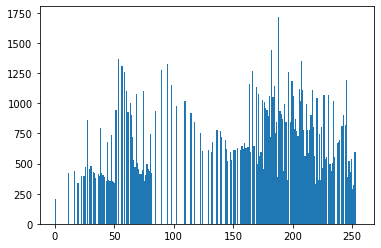

In [18]:
img = cv2.imread('pic1.jpg')
original = img
specified = cv2.imread("pic2.jpg")
img = cv2.resize(img, [200,200])
specified = cv2.resize(specified, [200,200])
# perform Histogram Matching
a = hist_match(img, specified)

# Display the image
res1 = np.hstack([img, specified, np.array(a,dtype='uint8')])
cv2_imshow(res1)
plt.hist(original.flatten(), 256, [0,256])
plt.show()
plt.hist(specified.flatten(), 256, [0,256])
plt.show()
plt.hist(np.array(a,dtype='uint8').flatten(), 256, [0,256])
plt.show()